In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2022)

In [2]:
# Data Load
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4) # data의 크기를 줄여서 진행

In [3]:
data, target = faces["data"], faces["target"]

In [4]:
# Data EDA
n_samples, h, w = faces.images.shape

In [5]:
n_samples, h, w

(1288, 50, 37)

In [6]:
target_names = faces.target_names
n_classes = target_names.shape[0]

In [7]:
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

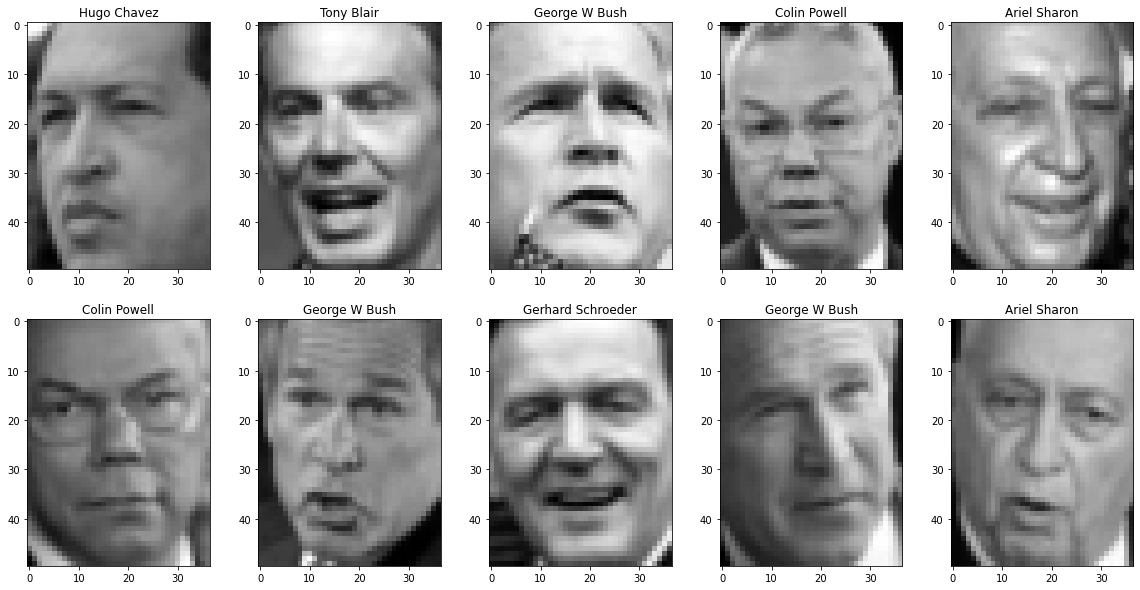

In [8]:
samples = data[:10].reshape(10, h, w)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
for idx, sample in enumerate(samples):
    ax = axes[idx//5, idx%5]
    ax.imshow(sample, cmap="gray")
    ax.set_title(target_names[target[idx]])

In [9]:
# Data Split
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021
)

In [10]:
print(f"train_data size: {len(train_target)}, {len(train_target)/len(data):.2f}")
print(f"test_data size: {len(test_target)}, {len(test_target)/len(data):.2f}")

train_data size: 901, 0.70
test_data size: 387, 0.30


In [11]:
# Data Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [12]:
scaler.fit(train_data)

StandardScaler()

In [13]:
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [14]:
# SVM
from sklearn.svm import SVC

svm = SVC()

In [15]:
# 학습
svm.fit(scaled_train_data, train_target)

SVC()

In [16]:
train_pred = svm.predict(scaled_train_data)
test_pred = svm.predict(scaled_test_data)

In [17]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(train_target, train_pred)
test_acc = accuracy_score(test_target, test_pred)

In [18]:
print(f"train accuracy is {train_acc:.4f}")
print(f"test accuracy is {test_acc:.4f}")

train accuracy is 0.9567
test accuracy is 0.7339


In [19]:
# Hyper Parameter tuning
from sklearn.model_selection import GridSearchCV

In [20]:
# 탐색 범위 지정
params = [
    {"kernel": ["linear"], "C": [10, 30, 100, 300, 1000, 3000, 10000, 30000]},
    {
        "kernel": ["rbf"],
        "C": [1, 3, 10, 30, 100, 300, 1000],
        "gamma": [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
    },
]

In [21]:
params

[{'kernel': ['linear'], 'C': [10, 30, 100, 300, 1000, 3000, 10000, 30000]},
 {'kernel': ['rbf'],
  'C': [1, 3, 10, 30, 100, 300, 1000],
  'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}]

In [22]:
# 3*2*8*2*7*6 = 4032개의 모델 탐색
grid_cv = GridSearchCV(svm, params, cv=3, n_jobs=-1)
grid_cv.fit(scaled_train_data, train_target)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [10, 30, 100, 300, 1000, 3000, 10000, 30000],
                          'kernel': ['linear']},
                         {'C': [1, 3, 10, 30, 100, 300, 1000],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}])

In [23]:
# 결과
print(f"Best score of paramter search is: {grid_cv.best_score_:.4f}")

Best score of paramter search is: 0.8191


In [24]:
print("Best parameter of best score is")
for key, value in grid_cv.best_params_.items():
    print(f"\t {key}: {value}")

Best parameter of best score is
	 C: 10
	 kernel: linear


In [25]:
train_pred = grid_cv.best_estimator_.predict(scaled_train_data)
test_pred = grid_cv.best_estimator_.predict(scaled_test_data)

In [26]:
best_train_acc = accuracy_score(train_target, train_pred)
best_test_acc = accuracy_score(test_target, test_pred)

In [27]:
print(f"Best Parameter train accuracy is {best_train_acc:.4f}")
print(f"Best Parameter test accuracy is {best_test_acc:.4f}")

Best Parameter train accuracy is 1.0000
Best Parameter test accuracy is 0.8605


In [28]:
print(f"Baseline test accuracy is {test_acc:.4f}")
print(f"Best Parameter test accuracy is {best_test_acc:.4f}")

Baseline test accuracy is 0.7339
Best Parameter test accuracy is 0.8605


In [ ]:
# SVM은 어떤 argument를 주는지에 따라 성능이 크게 바뀜
# 하이퍼파라미터가 중요